# <div style='text-align: center;'>OGTIP INTERNSHIP</div>
## <div style='text-align: center;'>Project Final</div>
<div style='text-align: right;'>by Alexandr Zaitsev</div>

#### *Overview: in this project we will use keras to classify handwritten letters.*
### Project description.
We are given the handwriting data set of a popular language alphabet that contains various handwriting scripts for each individual letter of that alphabet taken from different individuals in real time.\
Data is already processed and given to us to prepare a machine learning model to identify each letter correctly.

### Our goal.
Prepare a model that can classify the letters with high accuracy.

### Plan of execution.
1. Import all necessary libraries.
2. Load the data and explore it.
3. Split the data into train and test sets.
4. Choose the right parameters for the model.
5. Build the model with the best parameters.
6. Make predictions and evaluate them.

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
# Load the dataset.
df = pd.read_csv('A_Z Handwritten Data.csv')

# Print first 5 rows.
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Explore the shape of the data.
df.shape

(372450, 785)

In [4]:
# Get unique values from first column.
df['0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

We see that the dataset has 372,450 rows and 785 columns, first column must be a label and the rest columns in a row are flattened [28 x 28] matrix.\
Let's see what kind of labels are there.

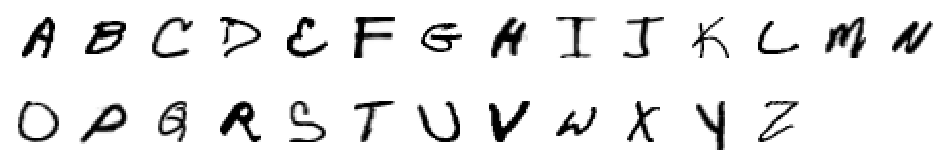

In [5]:
# Save first occured index of each label.
indexes = []
for i in df['0'].unique():
    indexes.append(df[df['0'] == i].index[0])

# Display labels.
plt.figure(figsize=(12, 2))
for i in range(len(indexes)):
    plt.subplot(2, 14, i + 1)
    plt.imshow(df.iloc[:, 1:].loc[[indexes[i]]].values.reshape(28, 28), 
               cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')

We see that the labels represent English alphabet.\
Make some changes to the dataset by renaming the first column.

In [6]:
# Rename first column.
df.rename(columns={'0': 'Label'}, inplace=True)

# Create a dictionary of letters for a better future representation.
letters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'G', 
           10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
           19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

We have to split our data into train and test sets by using `train_test_split()` from `sklearn` library.\
As we are dealing with images, we need to rescale from inputs in the [0, 255] range to inputs in the [0, 1] range. We will do this manually by deviding by 255.

In [7]:
# Split the data into train and test sets.
X = df.iloc[:, 1:]
y = df[['Label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Rescale.
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Building a model.
First, we need to instantiate a keras model. The **Sequential** model in keras is a linear stack of layers. This class helps in creating a cluster where a cluster is formed with layers of information or data that flows with top to bottom approach having a lot of layers incorporated with tf.keras.\
`tf.keras.Sequential()`\
\
The model needs to know what input shape it should expect. **Input** is used to instantiate a Keras tensor. The first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape.\
`tf.keras.Input(shape=None)`
* shape	- a shape tuple (integers), not including the batch size. For instance, shape=(32,) indicates that the expected input will be batches of 32-dimensional vectors.

We will add layers using Keras **Dense**, which is one of the available layers in keras models, most oftenly added in the neural networks. This layer contains densely connected neurons. Each of the individual neurons of the layer takes the input data from all the other neurons before a currently existing one.
`tf.keras.layers.Dense(units, activation=None)`
* units – a positive integer and a basic parameter used to specify the size of the output generated from the layer. It has relevance in the weight matrix, which helps specify its size and the bias vector.
* activation - activation function to use.

We need to determine the number of neurons in the hidden layer. There are several rule-of-thumb methods for this:
* The number of hidden neurons should be between the size of the input layer and the size of the output layer.
* The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
* The number of hidden neurons should be less than twice the size of the input layer.

However, to prevent overfitting we can use the formula below.\
$$ N_{h} = \frac{N_{s}}{(\alpha * (N_{i} + N_{o}))} $$
$N_{i}$ - number of input neurons.\
$N_{o}$ - number of output neurons.\
$N_{s}$ - number of samples in training data set.\
$\alpha$ - an arbitrary scaling factor usually 2-10.

**Activation functions.** \
An activation function in a neural network defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network. The choice of activation function has a large impact on the capability and performance of the neural network, and different activation functions may be used in different parts of the model.\
There are three common activation functions for hidden layers:
1. Rectified Linear Activation (ReLU)
2. Logistic (Sigmoid)
3. Hyperbolic Tangent (Tanh)

There are two common activation functions for the output layer for a classification problem:
1. Logistic (Sigmoid)
2. Softmax

Each neuron should be asigned a weight and the weights should be of optimum values. A good optimizer will help to solve this problem. In general, optimizers are used in neural networks because it involves randomly initializing and manipulating the value of weights for every epoch to increase the model network’s accuracy potential. In other words, they help to find a proper and optimized loss function to obtain the ideal desired weights.\
We will choose the most popular optimizer for neural networks - **adam**.\
The loss is computed for the gradients with respect to the model’s weights. Custom loss function is calculated, and the network is updated after each iteration until the model is updated for bringing the improvement in the desired evaluation metric.
Cross Entropy is the most used loss function in classification problems.

In [8]:
print('Recommended number of neurons: ' + str(int(X_train_scaled.shape[0] / (2 * (784 + 26)))))

Recommended number of neurons: 183


In [9]:
# We will create lists of functions to test the best combination of them.
# Loop through each of them, write the results into a dictionary and display.
hidden_funcs = ['relu', 'sigmoid', 'tanh']
output_funcs = ['sigmoid', 'softmax']
results = {}

for hidden in hidden_funcs:
    for output in output_funcs:
        # Instantiate a model.
        model = keras.Sequential()

        # Instantiate a Keras tensor with a shape of 784.
        model.add(keras.Input(shape=(784,)))

        # Instantiate a hidden layer.
        # We will choose a low number of neurons to make the process faster.
        model.add(keras.layers.Dense(54, activation=hidden))

        # Add an output layer with output of 26 labels.
        model.add(keras.layers.Dense(26, activation=output))

        # Configure the model for training.
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Fit the model.
        model.fit(X_train_scaled, y_train, epochs=5, verbose=0)
        loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
        results[f'{hidden} ==> {output}'] = {'loss': loss, 'accuracy': acc}

# Show the results.
pd.DataFrame(data=[i for i in results.values()], 
             index=[i for i in results.keys()]).sort_values(by='accuracy', ascending=False)

,loss,accuracy
relu ==> softmax,0.139754,0.962035
relu ==> sigmoid,0.149858,0.958800
tanh ==> softmax,0.152644,0.956692
tanh ==> sigmoid,0.157173,0.954343
sigmoid ==> softmax,0.174010,0.952396
sigmoid ==> sigmoid,0.175223,0.952128


In [10]:
# Build the model with recommended activation functions.
model = keras.Sequential([
    keras.layers.Dense(183, input_shape=(784, ), activation='relu'),
    keras.layers.Dense(26, activation = 'softmax')
])

# Configure the model for training.
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Stop training when a monitored metric has stopped improving.
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.fit(X_train_scaled, y_train, epochs=30, verbose=0)

In [11]:
loss, acc = model.evaluate(X_test_scaled , y_test, verbose=0)
print('Model metrics.')
print('Loss:', loss)
print('Accuracy:', acc)

Model metrics.
Loss: 0.09297329932451248
Accuracy: 0.9885488152503967


In [12]:
# Predict labels.
y_pred = model.predict(X_test_scaled)

2328/2328 [==============================] - 2s 863us/step


In [13]:
# We will get the label values by calling np.argmax() function.
# The funstion returns the indices of the maximum values along an axis.
y_predicted_labels = [np.argmax(i) for i in y_pred]

In [14]:
# Create a list of missclassified letters.
index = 0
misclassified_imgs = []
for actual, predicted in zip(list(y_test['Label']), y_predicted_labels):
    if actual != predicted: misclassified_imgs.append(index)
    index += 1

In [15]:
print(f"Correct predictions: {(1 - len(misclassified_imgs) / len(y_test['Label'])) * 100:.2f} %")

Correct predictions: 98.85 %


In [16]:
# Replace encoded label values with actual letters.
y_test.replace({'Label': letters}, inplace=True)
y_predicted_labels = [letters.get(i) for i in y_predicted_labels]

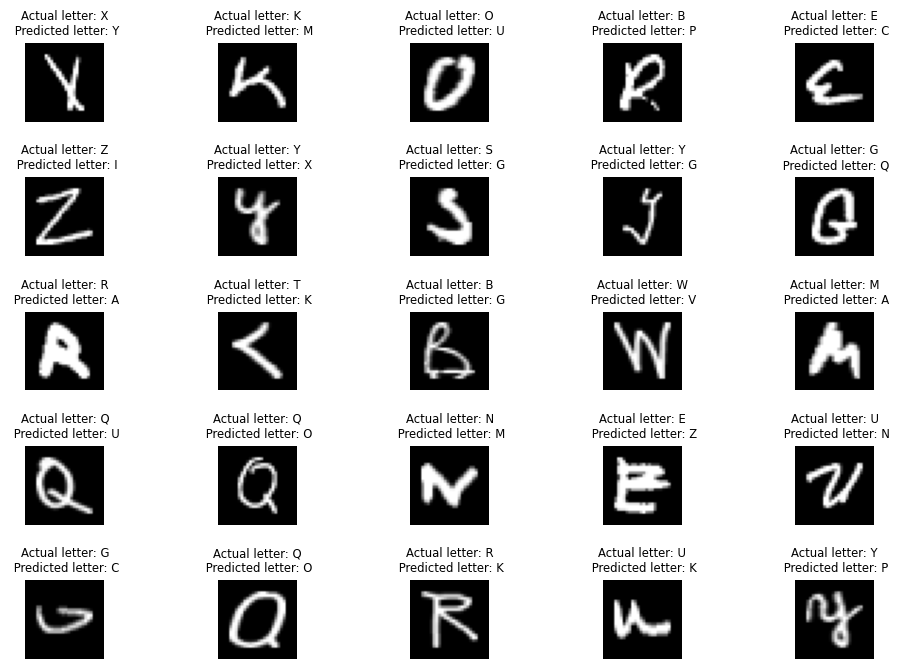

In [17]:
# Display misclassified letters.
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.7)
index_plot = 0
for i in misclassified_imgs[:25]:
    plt.subplot(5, 5, index_plot + 1)
    index_plot += 1
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap=plt.cm.gray)
    plt.title(f'Actual letter: {y_test.iloc[i].values[0]}\n Predicted letter: {y_predicted_labels[i]}', 
              fontdict={'fontsize': 'small'})
    plt.axis('off')

##### Conclusion.
The final model has 98.85% accuracy. From the images of missclassified letters we see that the handwritten letters are very tricky and some of them are confusing even for a human. For example, actual letter "T" which is right in the middle was classified as "Y", howerver it looks neither like "T" nor like "Y", possibly like "i" or "l". Nevertheless, the model shows very good results. The solution to misclassified letters is to gather more data with tricky letters.